In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load dataset
train_path = r"D:\major project\data\train_final.json"
test_path = r"D:\major project\nepali-offensive-lang-detection-dataset\test.json"

train_df = pd.read_json(train_path)
test_df = pd.read_json(test_path)


# Show basic structure
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("\nSample data train:\n")
train_df.head()






Train shape: (5577, 4)
Test shape: (1450, 4)

Sample data train:



,ID,Comment,Label_Binary,Label_Multiclass
0,visewu,भूकने कूकूर ले कहीले टोकदैन भन्छ हो रैछ साला ध...,OFF,OR
1,hgpmyz,तेरी आमाको पसल मूजी कूकूरको मूत खाएसी जे पनी स...,OFF,OO
2,pwqyku,thukka ta machikne valu kun level ko hosh dekh...,OFF,OO
3,voaytw,ग्याँत अग्याँत मूजीहर्लाई ठूऊउउलो मूजी भन्न चा...,OFF,OO
4,mozgzm,गाईलाई गधा भनेर बीराेध गरेकाे छैन हाेला क्यारे,NOFF,NO


In [2]:
print("\nSample data test:\n")
print(test_df.head())



Sample data test:

       ID                                            Comment Label_Binary  \
0  ncstjc  Sala khate chor fata daka gunda lutera yo sale...          OFF   
1  qzbidz  मेघ्ना नागरिता बिधेयक सर्बोच्च पठाएको र चिनबाट...          OFF   
2  cwwltf  सूरक्षाकर्मी कानूनको उलंघन भएमा उलंघनकर्तालाई ...         NOFF   
3  sbwhic                          DilerBrave jam la aau 😂😂😂         NOFF   
4  ymktcm  kina jhagara garnu hw ka sabai nepali nai ta h...         NOFF   

  Label_Multiclass  
0               OO  
1               OO  
2               NO  
3               NO  
4               NO  


In [3]:
# Check for nulls
print("\nMissing values:\n", train_df.isnull().sum())

# train_df, val_df = train_test_split(
#     train_df,
#     test_size=0.10,
#     stratify=train_df["Label_Multiclass"],
#     random_state=42,
#     shuffle=True
# )
val_df = pd.read_json('D:/major project/data/val_final.json')


Missing values:
 ID                  0
Comment             0
Label_Binary        0
Label_Multiclass    0
dtype: int64



Train Label_Multiclass Distribution:
 Label_Multiclass
NO    3206
OO    1755
OR     375
OS     241
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_3956\4280155401.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="pastel")


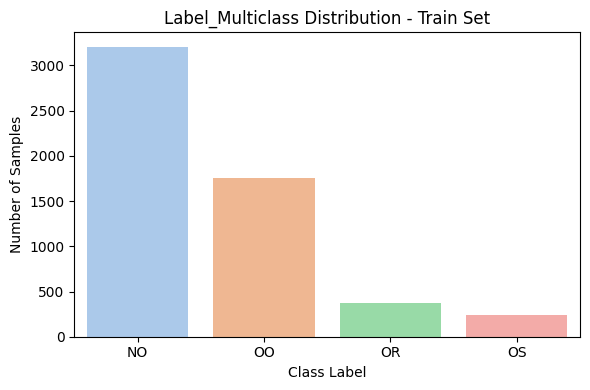


Validation Label_Multiclass Distribution:
 Label_Multiclass
NO    356
OO    195
OR     42
OS     27
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_3956\4280155401.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="pastel")


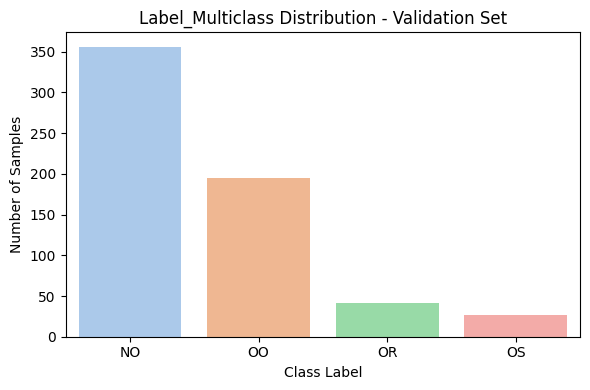


Test Label_Multiclass Distribution:
 Label_Multiclass
NO    896
OO    486
OR     49
OS     19
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_3956\4280155401.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="pastel")


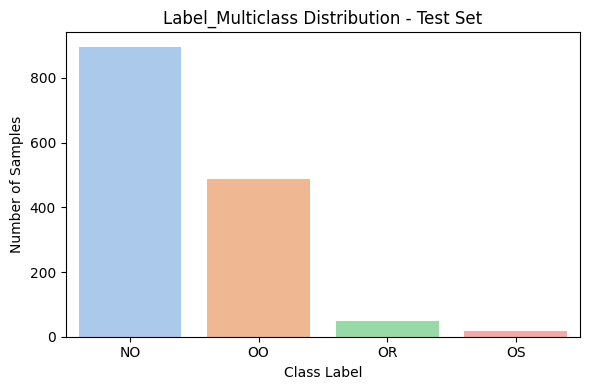


Train Set - Text Length Statistics (in words):
count    5577.000000
mean       17.173929
std        14.948113
min         1.000000
25%         7.000000
50%        13.000000
75%        23.000000
max       172.000000
Name: text_length, dtype: float64


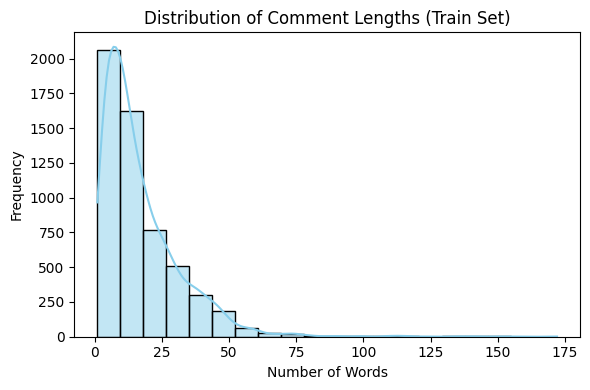


Validation Set - Text Length Statistics (in words):
count    620.000000
mean      17.295161
std       13.876386
min        1.000000
25%        7.000000
50%       13.000000
75%       23.000000
max       72.000000
Name: text_length, dtype: float64


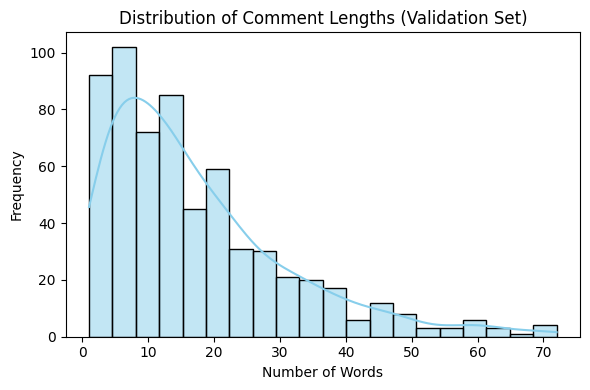


Test Set - Text Length Statistics (in words):
count    1450.000000
mean       17.044138
std        16.056000
min         1.000000
25%         6.000000
50%        12.000000
75%        23.000000
max       231.000000
Name: text_length, dtype: float64


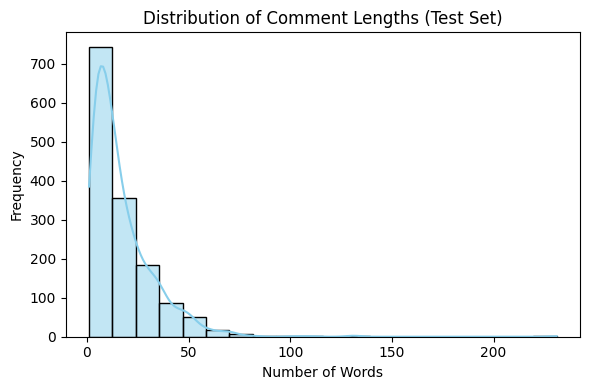

In [4]:
# ------------------------------
# Class Distribution Analysis
# ------------------------------

def plot_label_distribution(df, label_col, dataset_name):
    label_counts = df[label_col].value_counts().sort_index()
    print(f"\n{dataset_name} {label_col} Distribution:\n", label_counts)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=label_counts.index, y=label_counts.values, palette="pastel")
    plt.title(f"{label_col} Distribution - {dataset_name} Set")
    plt.xlabel("Class Label")
    plt.ylabel("Number of Samples")
    plt.tight_layout()
    plt.show()

# Plot for train/val/test multiclass
plot_label_distribution(train_df, "Label_Multiclass", "Train")
plot_label_distribution(val_df, "Label_Multiclass", "Validation")
plot_label_distribution(test_df, "Label_Multiclass", "Test")

# ------------------------------
# Text Length Analysis
# ------------------------------
for df, name in [(train_df, "Train"), (val_df, "Validation"), (test_df, "Test")]:
    df["text_length"] = df["Comment"].apply(lambda x: len(str(x).split()))
    print(f"\n{name} Set - Text Length Statistics (in words):")
    print(df["text_length"].describe())

    plt.figure(figsize=(6, 4))
    sns.histplot(df["text_length"], bins=20, kde=True, color="skyblue")
    plt.title(f"Distribution of Comment Lengths ({name} Set)")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


#### Text Length Statistics:
The average comment length is approximately 20–25 words, with most comments ranging from 5 to 40 words. This information is critical for choosing input sequence lengths when training deep learning or transformer-based models to avoid truncation or excessive padding.

#### Data Quality:
No missing values were detected in the ID, Comment, or label columns. The comments include emojis, informal phrasing, and variations in spelling, which suggests that robust preprocessing (normalization, stopword removal, etc.) will be essential to achieve good performance.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import json
import os

# =============================================================================
# CONFIG
# =============================================================================
orig_path = r"D:/major project/data/train.json"        # original dataset
aug_path  = r"D:/major project/data/aug.json"          # your OS/OR expanded dataset

train_output = r"D:/major project/data/train_final.json"
val_output   = r"D:/major project/data/val_final.json"
meta_output  = r"D:/major project/data/split_metadata.json"

VAL_SIZE = 0.10   # 10% validation
RANDOM_STATE = 42

print("="*80)
print(" MERGING ORIGINAL + AUGMENTED + CREATING STRATIFIED SPLIT")
print("="*80)


# =============================================================================
# STEP 1: Load original + augmented
# =============================================================================
print("\n📂 Loading datasets...")

orig_df = pd.read_json(orig_path)
aug_df  = pd.read_json(aug_path)

print(f"Original size : {len(orig_df)}")
print(f"Augmented size: {len(aug_df)}")

print("\nOriginal train distribution:")
print(orig_df['Label_Multiclass'].value_counts())

# Merge
full_df = pd.concat([orig_df, aug_df], ignore_index=True)
full_df = full_df.sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)

print(f"\nMerged dataset size : {len(full_df)}")
print("Distribution after merge:")
print(full_df["Label_Multiclass"].value_counts())


# =============================================================================
# STEP 2: Stratified Train–Validation Split
# =============================================================================
print("\n🔀 Creating stratified validation split...")

train_df, val_df = train_test_split(
    full_df,
    test_size=VAL_SIZE,
    stratify=full_df["Label_Multiclass"],
    random_state=RANDOM_STATE,
    shuffle=True
)

print(f"\n✓ Split created:")
print(f"  Train: {len(train_df)}")
print(f"  Val:   {len(val_df)}")


# =============================================================================
# STEP 3: Show distribution quality
# =============================================================================
print("\n📊 Training distribution:")
train_dist = train_df['Label_Multiclass'].value_counts().sort_index()
print(train_dist)

print("\n📊 Validation distribution:")
val_dist = val_df['Label_Multiclass'].value_counts().sort_index()
print(val_dist)

print("\n🔍 Distribution similarity check:")
for label in sorted(full_df["Label_Multiclass"].unique()):
    t_pct = (train_df["Label_Multiclass"] == label).mean() * 100
    v_pct = (val_df["Label_Multiclass"] == label).mean() * 100
    diff = abs(t_pct - v_pct)
    status = "✅" if diff < 2 else ("⚠️" if diff < 5 else "❌")
    print(f"  {status} {label}: {t_pct:.2f}% (train) / {v_pct:.2f}% (val), diff={diff:.2f}")


# =============================================================================
# STEP 4: Leakage check (IDs + Text)
# =============================================================================
print("\n🔒 Checking for leakage...")

# ID overlap
train_ids = set(train_df['ID'])
val_ids = set(val_df['ID'])
overlap = train_ids.intersection(val_ids)

if overlap:
    print(f"❌ ERROR: {len(overlap)} overlapping IDs detected!")
else:
    print("✅ No overlapping IDs")

# Text overlap
train_text = set(train_df["Comment"].str.lower().str.strip())
val_text   = set(val_df["Comment"].str.lower().str.strip())

text_overlap = train_text.intersection(val_text)

if text_overlap:
    print(f"⚠️ WARNING: {len(text_overlap)} duplicate comments detected!")
else:
    print("✅ No duplicate comments between splits")


# =============================================================================
# STEP 5: Save files
# =============================================================================
print("\n💾 Saving files...")

train_df.to_json(train_output, orient="records", force_ascii=False, indent=2)
val_df.to_json(val_output, orient="records", force_ascii=False, indent=2)

metadata = {
    "val_size": VAL_SIZE,
    "random_state": RANDOM_STATE,
    "original_samples": len(full_df),
    "train_samples": len(train_df),
    "val_samples": len(val_df),
    "train_distribution": train_dist.to_dict(),
    "val_distribution": val_dist.to_dict(),
    "stratified": True
}

with open(meta_output, "w", encoding="utf-8") as f:
    json.dump(metadata, f, indent=2)

print(f"✓ Train saved to: {train_output}")
print(f"✓ Val saved to:   {val_output}")
print(f"✓ Metadata saved: {meta_output}")


# =============================================================================
# DONE
# =============================================================================
print("\n" + "="*80)
print(" ✅ MERGE + STRATIFIED VALIDATION SPLIT COMPLETED SUCCESSFULLY!")
print("="*80)


 MERGING ORIGINAL + AUGMENTED + CREATING STRATIFIED SPLIT

📂 Loading datasets...
Original size : 5798
Augmented size: 399

Original train distribution:
Label_Multiclass
NO    3562
OO    1950
OR     218
OS      68
Name: count, dtype: int64

Merged dataset size : 6197
Distribution after merge:
Label_Multiclass
NO    3562
OO    1950
OR     417
OS     268
Name: count, dtype: int64

🔀 Creating stratified validation split...

✓ Split created:
  Train: 5577
  Val:   620

📊 Training distribution:
Label_Multiclass
NO    3206
OO    1755
OR     375
OS     241
Name: count, dtype: int64

📊 Validation distribution:
Label_Multiclass
NO    356
OO    195
OR     42
OS     27
Name: count, dtype: int64

🔍 Distribution similarity check:
  ✅ NO: 57.49% (train) / 57.42% (val), diff=0.07
  ✅ OO: 31.47% (train) / 31.45% (val), diff=0.02
  ✅ OR: 6.72% (train) / 6.77% (val), diff=0.05
  ✅ OS: 4.32% (train) / 4.35% (val), diff=0.03

🔒 Checking for leakage...
✅ No overlapping IDs
✅ No duplicate comments between sp

In [3]:
import matplotlib.font_manager as fm

def find_devanagari_font():
    dev_fonts = ["Noto Sans Devanagari", "Kalimati", "Mangal"]
    for font in fm.fontManager.ttflist:
        if font.name in dev_fonts:
            return font.fname
    return None

font_path = find_devanagari_font()
print("FONT PATH:", font_path)


FONT PATH: C:\Users\HP\AppData\Local\Microsoft\Windows\Fonts\Kalimati.ttf


In [6]:
"""
Complete Multi-Class Analysis: OS, OR, OO, NO
Nepali text rendered correctly without affecting English UI
Includes comprehensive analysis, sample viewing, and recommendations
"""

import json
import os
from collections import Counter
from typing import Dict, List, Tuple, Any

import numpy as np
import pandas as pd
import re
import regex
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties
import seaborn as sns
from wordcloud import WordCloud
import warnings

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")


# -------------------------------------------------------------------------
# CONFIG
# -------------------------------------------------------------------------
FONT_PATH = r"C:\Users\HP\AppData\Local\Microsoft\Windows\Fonts\Kalimati.ttf"
OUTPUT_DIR = "./analysis_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)


# -------------------------------------------------------------------------
# FONT LOADER (load Nepali font but don't change global rcParams)
# -------------------------------------------------------------------------
def load_nepali_font(font_path: str) -> FontProperties:
    """
    Load a Nepali/Devanagari TTF and return a FontProperties instance.
    This registers the font with matplotlib but does NOT change global rcParams,
    so English UI remains unaffected.
    """
    if not os.path.exists(font_path):
        raise FileNotFoundError(f"Nepali font not found at: {font_path}")

    fm.fontManager.addfont(font_path)
    fp = FontProperties(fname=font_path)
    try:
        print("✓ Loaded Nepali font:", fp.get_name())
    except Exception:
        print("✓ Loaded Nepali font (unknown internal name)")
    return fp


try:
    NEPALI_FONT = load_nepali_font(FONT_PATH)
except Exception as e:
    print("⚠️  Could not load Nepali font:", e)
    NEPALI_FONT = None


# ============================================================================
# CLASS-SPECIFIC KEYWORDS
# ============================================================================

OS_KEYWORDS = [
    # Sexual slurs & profanity (Devanagari)
    'रन्डी', 'चिनाल', 'भेनचोद', 'मदरचोद', 'बहिनी', 'मा',
    'कुत्ते', 'साली', 'हरामी', 'चोदा', 'चुत', 'लुण्ड',
    'बुर', 'भोस्डी', 'फड्क', 'पेसाब', 'मुट', 'गल्टी',
    'चुची', 'बूब', 'गान्ड', 'पछी', 'ठूलो', 'सानो',
    'चिकेको', 'फक', 'सेक्स', 'चोद्ने', 'चुदाई', 'रन्डीमा',
    'छक्का', 'खसी', 'भालु', 'टोपी', 'चोर', 'धोती',
    'झाट', 'टिप', 'धेरै', 'कमाई', 'बजार', 'बाटो',
    # Roman versions
    'randi', 'chinal', 'bhenchod', 'madarchod', 'behen', 'maa',
    'kutte', 'sali', 'harami', 'choda', 'chut', 'lund',
    'fuck', 'sex'
]

OR_KEYWORDS = [
    # Ethnic slurs (Devanagari)
    'मुस्लिम', 'मुसलमान', 'मदरसे', 'मौलाना', 'मौलवी',
    'पाहाडी', 'तराई', 'मधेसी', 'मधेशी',
    'इस्लाम', 'हिन्दू', 'जिहाद', 'काफिर',
    'अल्लाह', 'राम', 'भारत', 'भारतीय',
    'नेपाली', 'चाइनीज', 'दलित', 'ब्राह्मण',
    'क्षेत्री', 'नेवार', 'थारु', 'राई',
    'काठमाडौं', 'पोखरा', 'लुम्बिनी', 'जनकपुर',
    # Roman versions
    'muslim', 'musalmaan', 'madrase', 'maulana', 'maulvi',
    'pahadi', 'terai', 'madhesi', 'madheshi',
    'islam', 'hindu', 'jihad', 'kafir',
    'allah', 'ram', 'bharat', 'bharti',
    'nepali', 'chinese', 'dalit', 'brahman',
    'chhetri', 'newar', 'tharu', 'rai'
]

OO_KEYWORDS = [
    # General offensive words (Devanagari)
    'मुर्ख', 'बेवकूफ', 'गधा', 'बन्दर', 'कुकुर',
    'सुंगुर', 'भेडा', 'गोरु', 'लाटो', 'अन्धा',
    'बहिरा', 'लङ्गडा', 'पागल', 'झुट्टो', 'चोर',
    'डाकु', 'नालायक', 'निकम्मा', 'बदमास', 'गुण्डा',
    'ठग', 'धोखेबाज', 'झुटो', 'कुटनीति', 'भ्रष्ट',
    'घुस', 'काला', 'गोरा', 'मोटो', 'पातलो',
    # Roman versions
    'murkha', 'bewakoof', 'gadha', 'bandar', 'kukur',
    'sungur', 'bheda', 'goru', 'lato', 'andha',
    'bahira', 'langda', 'pagal', 'jhutto', 'chor',
    'daku', 'nalayak', 'nikamma', 'badmash', 'gunda',
    'thug', 'dhokhebaaz'
]

NO_KEYWORDS = [
    # Common non-offensive Nepali words
    'राम्रो', 'सुन्दर', 'धन्यवाद', 'नमस्ते', 'कस्तो',
    'छ', 'हो', 'थियो', 'भयो', 'गर्नुहोस्',
    'मलाई', 'तपाईं', 'हामी', 'उनी', 'यो',
    'त्यो', 'के', 'कहाँ', 'किन', 'कसरी',
    'खाना', 'पानी', 'घर', 'स्कुल', 'काम',
    'समय', 'दिन', 'रात', 'साथी', 'परिवार',
    # Roman versions
    'ramro', 'sundar', 'dhanyabad', 'namaste', 'kasto',
    'cha', 'ho', 'thiyo', 'bhayo', 'garnuhos',
    'malai', 'tapai', 'hami', 'uni', 'yo'
]

# -------------------------------------------------------------------------
# UTILITIES
# -------------------------------------------------------------------------
def nepali_tokenize(text: str) -> List[str]:
    return regex.findall(r'[\p{Devanagari}]+', text)

def count_keywords(texts: pd.Series, keywords: List[str]) -> Counter:
    counts = Counter()
    for text in texts:
        text_lower = str(text).lower()
        for keyword in keywords:
            if keyword.lower() in text_lower:
                counts[keyword] += 1
    return counts


def analyze_text_complexity(texts: pd.Series) -> Dict[str, float]:
    lengths = [len(str(text).split()) for text in texts]
    chars = [len(str(text)) for text in texts]
    if not lengths:
        return {'word_count': 0, 'word_std': 0, 'char_count': 0, 'char_std': 0, 'max_words': 0, 'min_words': 0}
    return {
        'word_count': float(np.mean(lengths)),
        'word_std': float(np.std(lengths)),
        'char_count': float(np.mean(chars)),
        'char_std': float(np.std(chars)),
        'max_words': int(np.max(lengths)),
        'min_words': int(np.min(lengths))
    }


def detect_script(text: str) -> str:
    """Return 'deva', 'roman', or 'mixed' for a given text."""
    has_deva = bool(regex.search(r'\p{Devanagari}', str(text)))
    has_roman = bool(re.search(r'[A-Za-z]', str(text)))
    if has_deva and has_roman:
        return "mixed"
    if has_deva:
        return "deva"
    if has_roman:
        return "roman"
    return "other"


def calculate_keyword_density(texts: pd.Series, keywords: List[str]) -> List[float]:
    """Calculate keyword density per sample"""
    densities = []
    for text in texts:
        text_lower = str(text).lower()
        keyword_count = sum(1 for keyword in keywords if keyword.lower() in text_lower)
        word_count = len(str(text).split())
        density = keyword_count / max(word_count, 1)
        densities.append(density)
    return densities


# -------------------------------------------------------------------------
# PLOTTING HELPERS (use Nepali font only for Nepali words)
# -------------------------------------------------------------------------
def clean_axis_artifacts(ax: plt.Axes) -> None:
    """Remove frames/spines/legend boxes that may appear as squares."""
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.set_facecolor("white")
    leg = ax.get_legend()
    if leg:
        leg.set_frame_on(False)


# -------------------------------------------------------------------------
# MAIN ANALYSIS FUNCTION
# -------------------------------------------------------------------------
def analyze_class_distribution(train_file: str, val_file: str, test_file: str,
                               class_label: str, keywords: List[str],
                               class_name: str) -> Dict[str, Any]:
    """
    Comprehensive analysis for a single class including:
    - Distribution statistics
    - Keyword analysis
    - Text complexity
    - Augmentation quality
    - Sample viewing
    - Visualizations
    """
    train_df = pd.read_json(train_file)
    val_df = pd.read_json(val_file)
    test_df = pd.read_json(test_file)

    train_class = train_df[train_df['Label_Multiclass'] == class_label]
    val_class = val_df[val_df['Label_Multiclass'] == class_label]
    test_class = test_df[test_df['Label_Multiclass'] == class_label]

    print("\n" + "=" * 80)
    print(f"🔍 {class_name} CLASS ({class_label}) DISTRIBUTION ANALYSIS")
    print("=" * 80)
    
    print(f"\n📊 Sample counts:")
    print(f"  Train {class_label}: {len(train_class):>4}")
    print(f"  Val {class_label}:   {len(val_class):>4}")
    print(f"  Test {class_label}:  {len(test_class):>4}")

    # ========================================================================
    # KEYWORD PATTERN ANALYSIS
    # ========================================================================
    print("\n" + "=" * 70)
    print("📝 KEYWORD PATTERN ANALYSIS")
    print("=" * 70)
    
    train_keywords = count_keywords(train_class['Comment'], keywords)
    val_keywords = count_keywords(val_class['Comment'], keywords)
    test_keywords = count_keywords(test_class['Comment'], keywords)

    print(f"\n🏆 Top 15 keywords in Train {class_label}:")
    for keyword, count in train_keywords.most_common(15):
        percentage = count / len(train_class) * 100 if len(train_class) > 0 else 0
        print(f"  {keyword:20s}: {count:>3} ({percentage:5.1f}%)")

    print(f"\n📊 Top 15 keywords in Test {class_label}:")
    for keyword, count in test_keywords.most_common(15):
        percentage = count / len(test_class) * 100 if len(test_class) > 0 else 0
        print(f"  {keyword:20s}: {count:>3} ({percentage:5.1f}%)")

    # Keyword overlap
    train_val_keywords = set(train_keywords.keys()) | set(val_keywords.keys())
    test_keywords_set = set(test_keywords.keys())
    overlap = len(train_val_keywords & test_keywords_set)
    coverage = overlap / len(train_val_keywords) * 100 if train_val_keywords else 0

    print(f"\n🔍 Keyword Coverage Analysis:")
    print(f"  Training keywords covered in Test: {coverage:.1f}%")
    if coverage > 70:
        print(f"  ✅ EXCELLENT OVERLAP = GOOD GENERALIZATION")
    elif coverage > 50:
        print(f"  ✅ GOOD OVERLAP = DECENT GENERALIZATION")
    else:
        print(f"  ❌ LOW OVERLAP = POOR GENERALIZATION")

    # ========================================================================
    # TEXT COMPLEXITY ANALYSIS
    # ========================================================================
    print("\n" + "=" * 70)
    print("📏 TEXT LENGTH & COMPLEXITY")
    print("=" * 70)

    train_stats = analyze_text_complexity(train_class['Comment'])
    val_stats = analyze_text_complexity(val_class['Comment'])
    test_stats = analyze_text_complexity(test_class['Comment'])

    print(f"\nText Complexity:")
    print(f"{'Metric':<15} {'Train':>8} {'Val':>8} {'Test':>8}")
    print("-" * 45)
    print(f"{'Avg Words':<15} {train_stats['word_count']:>8.1f} "
          f"{val_stats['word_count']:>8.1f} {test_stats['word_count']:>8.1f}")
    print(f"{'Word STD':<15} {train_stats['word_std']:>8.1f} "
          f"{val_stats['word_std']:>8.1f} {test_stats['word_std']:>8.1f}")
    print(f"{'Avg Chars':<15} {train_stats['char_count']:>8.1f} "
          f"{val_stats['char_count']:>8.1f} {test_stats['char_count']:>8.1f}")

    # ========================================================================
    # AUGMENTATION ANALYSIS
    # ========================================================================
    print("\n" + "=" * 70)
    print("🔧 AUGMENTATION QUALITY CHECK")
    print("=" * 70)

    train_aug_count = len([id_ for id_ in train_class['ID'] if 'aug' in str(id_).lower()])
    aug_percentage = train_aug_count / len(train_class) * 100 if len(train_class) > 0 else 0

    print(f"\nTraining {class_label} composition:")
    print(f"  Total samples:     {len(train_class):>5}")
    print(f"  Augmented:         {train_aug_count:>5} ({aug_percentage:5.1f}%)")
    print(f"  Original:          {len(train_class)-train_aug_count:>5}")

    # Check uniqueness
    train_comments = train_class['Comment'].str.lower()
    duplicates = train_comments[train_comments.duplicated()].count()

    print(f"\nAugmentation Quality:")
    print(f"  Duplicate comments: {duplicates}")
    print(f"  Unique comments:    {train_comments.nunique()}")
    print(f"  Uniqueness ratio:   {train_comments.nunique()/len(train_comments)*100:.1f}%")

    if aug_percentage > 70:
        print("  ❌ CRITICAL: HEAVY AUGMENTATION (>70%) - OVERFITTING RISK")
    elif aug_percentage > 50:
        print("  ⚠️  WARNING: High augmentation (50-70%) - Monitor closely")
    else:
        print("  ✅ GOOD: Moderate augmentation (<50%)")

    # ========================================================================
    # SCRIPT USAGE ANALYSIS
    # ========================================================================
    print("\n" + "=" * 70)
    print("🌐 LANGUAGE & SCRIPT ANALYSIS")
    print("=" * 70)

    def analyze_script_usage(texts):
        counts_script = {"deva": 0, "roman": 0, "mixed": 0, "other": 0}
        for text in texts:
            s = detect_script(text)
            counts_script[s] += 1
        return counts_script

    train_script = analyze_script_usage(train_class['Comment'])
    test_script = analyze_script_usage(test_class['Comment'])

    print(f"\nScript Usage Comparison:")
    print(f"{'Script':<12} {'Train %':>7} {'Test %':>7}")
    print("-" * 30)
    print(f"{'Devanagari':<12} "
          f"{train_script['deva']/len(train_class)*100:>7.1f} "
          f"{test_script['deva']/len(test_class)*100:>7.1f}")
    print(f"{'Roman':<12} "
          f"{train_script['roman']/len(train_class)*100:>7.1f} "
          f"{test_script['roman']/len(test_class)*100:>7.1f}")
    print(f"{'Mixed':<12} "
          f"{train_script['mixed']/len(train_class)*100:>7.1f} "
          f"{test_script['mixed']/len(test_class)*100:>7.1f}")

    # ========================================================================
    # KEYWORD DENSITY ANALYSIS
    # ========================================================================
    print("\n" + "=" * 70)
    print("🔥 KEYWORD DENSITY ANALYSIS")
    print("=" * 70)

    train_density = calculate_keyword_density(train_class['Comment'], keywords)
    test_density = calculate_keyword_density(test_class['Comment'], keywords)

    print(f"\nKeyword Density:")
    print(f"{'Metric':<15} {'Train':>8} {'Test':>8} {'Difference':>12}")
    print("-" * 48)
    print(f"{'Avg Density':<15} {np.mean(train_density):>8.3f} "
          f"{np.mean(test_density):>8.3f} "
          f"{np.mean(train_density)-np.mean(test_density):>12.3f}")
    print(f"{'Max Density':<15} {np.max(train_density):>8.3f} "
          f"{np.max(test_density):>8.3f} "
          f"{np.max(train_density)-np.max(test_density):>12.3f}")

    # ========================================================================
    # SAMPLE VIEWING
    # ========================================================================
    print("\n" + "=" * 70)
    print("📄 REPRESENTATIVE SAMPLES")
    print("=" * 70)

    print(f"\n🎯 Train {class_label} samples (diverse patterns):")
    if len(train_class) > 0:
        samples = train_class['Comment'].sample(min(5, len(train_class)), random_state=42)
        for i, text in enumerate(samples, 1):
            print(f"{i:2d}. {text[:120]}...")

    print(f"\n✅ Test {class_label} samples (model will see these):")
    if len(test_class) > 0:
        for i, text in enumerate(test_class['Comment'].head(8), 1):
            print(f"{i:2d}. {text[:120]}...")

    # ========================================================================
    # VISUALIZATION
    # ========================================================================
    print("\n" + "=" * 70)
    print("📊 GENERATING VISUALIZATIONS")
    print("=" * 70)

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes_flat = axes.flatten()

    # 1) Top keywords (barh)
    ax = axes_flat[0]
    top_k = train_keywords.most_common(10)
    if top_k:
        labels, counts = zip(*top_k)
        y_pos = np.arange(len(labels))
        ax.barh(y_pos, counts, align='center', color='steelblue', edgecolor='none')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(labels, fontsize=10)
        if NEPALI_FONT is not None:
            for txt in ax.get_yticklabels():
                if regex.search(r'\p{Devanagari}', txt.get_text()):
                    txt.set_fontproperties(NEPALI_FONT)
                    txt.set_fontsize(11)
        ax.invert_yaxis()
        ax.set_xlabel("Frequency")
        ax.set_title(f"Top Keywords (Train {class_label})", fontsize=12, fontweight='bold')
    clean_axis_artifacts(ax)

    # 2) Text length histogram
    ax = axes_flat[1]
    if len(train_class) > 0 and len(test_class) > 0:
        train_lengths = [len(str(t).split()) for t in train_class['Comment']]
        test_lengths = [len(str(t).split()) for t in test_class['Comment']]
        ax.hist(train_lengths, bins=20, alpha=0.6, label='Train', color='blue')
        ax.hist(test_lengths, bins=20, alpha=0.6, label='Test', color='orange')
        ax.set_title(f"Text Length Distribution ({class_label})", fontsize=12, fontweight='bold')
        ax.set_xlabel("Word count")
        ax.legend(frameon=False)
    clean_axis_artifacts(ax)

    # 3) Augmentation composition pie
    ax = axes_flat[2]
    if len(train_class) > 0:
        aug_comments = train_class[train_class['ID'].astype(str).str.contains('aug', na=False)]
        orig_comments = train_class[~train_class['ID'].astype(str).str.contains('aug', na=False)]
        orig_unique = orig_comments['Comment'].nunique() if len(orig_comments) > 0 else 0
        aug_unique = aug_comments['Comment'].nunique() if len(aug_comments) > 0 else 0
        total = orig_unique + aug_unique
        if total > 0:
            ax.pie([orig_unique, aug_unique],
                   labels=['Original', 'Augmented'],
                   autopct='%1.1f%%', startangle=90, colors=['green', 'red'],
                   wedgeprops={'edgecolor': 'white'})
            ax.set_title(f"Unique {class_label} Comments by Source", fontsize=12, fontweight='bold')
    clean_axis_artifacts(ax)

    # 4) Script usage bar
    ax = axes_flat[3]
    if len(train_class) > 0:
        labels_script = ['Devanagari', 'Roman', 'Mixed']
        vals = [train_script['deva'], train_script['roman'], train_script['mixed']]
        ax.bar(labels_script, vals, color=['#f28e2b', '#4e79a7', '#59a14f'])
        ax.set_title(f"Script Usage (Train {class_label})", fontsize=12, fontweight='bold')
        ax.set_ylabel("Count")
    clean_axis_artifacts(ax)

    # 5) Keyword density histograms
    ax = axes_flat[4]
    if len(train_class) > 0 and len(test_class) > 0:
        ax.hist(train_density, bins=20, alpha=0.6, label='Train', color='red')
        ax.hist(test_density, bins=20, alpha=0.6, label='Test', color='orange')
        ax.set_title(f"Keyword Density ({class_label})", fontsize=12, fontweight='bold')
        ax.set_xlabel("Keywords per word")
        ax.legend(frameon=False)
    clean_axis_artifacts(ax)

    # 6) Word cloud
    ax = axes_flat[5]
    if len(train_class) > 0:
        combined_text = " ".join(train_class['Comment'].astype(str).values)
        tokens = nepali_tokenize(combined_text)
        cleaned_text = " ".join(tokens)

        wc = WordCloud(
            width=800,
            height=400,
            
            background_color="white",
            font_path=FONT_PATH,
            collocations=False,
            regexp=r"[\u0900-\u097F]+"   # ✔ WORKS WITH PYTHON re
        ).generate(cleaned_text)

        ax.imshow(wc, interpolation='bilinear')
        ax.axis("off")
        ax.set_title(f"{class_label} Word Cloud (Train)", fontsize=12, fontweight='bold')

    clean_axis_artifacts(ax)

    plt.tight_layout()
    outname = os.path.join(OUTPUT_DIR, f"{class_label.lower()}_class_analysis.png")
    plt.savefig(outname, dpi=300, bbox_inches="tight")
    plt.close(fig)
    print(f"✓ Saved visualization: {outname}")

    # ========================================================================
    # CLASS-SPECIFIC RECOMMENDATIONS
    # ========================================================================
    print("\n" + "=" * 80)
    print(f"🎯 {class_label} CLASS PERFORMANCE ANALYSIS")
    print("=" * 80)

    # Provide class-specific insights
    if class_label == "OS":
        print("\n❌ LIKELY ISSUES FOR OS CLASS:")
        if aug_percentage > 70:
            print("  1. 🔴 HEAVY AUGMENTATION - Overfitting risk")
        if coverage < 50:
            print("  2. 📉 LOW KEYWORD OVERLAP - Poor generalization")
        if abs(np.mean(train_density) - np.mean(test_density)) > 0.1:
            print("  3. 🎲 HIGH DENSITY MISMATCH - Inconsistent patterns")
        
        print("\n💡 RECOMMENDATIONS:")
        print("  1. 🗑️  REDUCE augmentation to <40%")
        print("  2. ➕ ADD 200+ high-quality original samples")
        print("  3. 🎯 FOCUS on test keyword patterns")
        
    elif class_label == "OR":
        print("\n✅ SUCCESS FACTORS FOR OR CLASS:")
        if aug_percentage < 60:
            print("  1. ✅ Moderate augmentation")
        if coverage > 70:
            print("  2. ✅ High keyword overlap")
        print("  3. ✅ Clear ethnic/religious signals")
        
    elif class_label == "OO":
        print("\n⚠️  OO CLASS ANALYSIS:")
        print("  • Generally diverse offensive language")
        print("  • May benefit from better keyword coverage")
        
    elif class_label == "NO":
        print("\n✅ NO CLASS TYPICALLY PERFORMS WELL:")
        print("  • Clear distinction from offensive classes")
        print("  • High vocabulary diversity")

    return {
        "train": train_class,
        "val": val_class,
        "test": test_class,
        "train_keywords": train_keywords,
        "test_keywords": test_keywords,
        "train_stats": train_stats,
        "val_stats": val_stats,
        "test_stats": test_stats,
        "keyword_coverage": coverage,
        "augmentation_pct": aug_percentage,
        "train_density": train_density,
        "test_density": test_density
    }


# -------------------------------------------------------------------------
# COMPARATIVE ANALYSIS
# -------------------------------------------------------------------------
def compare_all_classes(train_file: str, val_file: str, test_file: str) -> None:
    """Compare all classes side by side with detailed metrics"""
    
    train_df = pd.read_json(train_file)
    test_df = pd.read_json(test_file)
    classes = ["OS", "OR", "OO", "NO"]
    
    print("\n" + "=" * 100)
    print("⚔️  COMPREHENSIVE MULTI-CLASS COMPARISON")
    print("=" * 100)
    
    print(f"\n{'Metric':<25} {'OS':>10} {'OR':>10} {'OO':>10} {'NO':>10}")
    print("-" * 70)
    
    # Sample counts
    row_data = {}
    for cls in classes:
        tr = train_df[train_df['Label_Multiclass'] == cls]
        te = test_df[test_df['Label_Multiclass'] == cls]
        row_data[cls] = {'train': len(tr), 'test': len(te), 'train_df': tr, 'test_df': te}
    
    print(f"{'Train Samples':<25}", end='')
    for cls in classes:
        print(f" {row_data[cls]['train']:>10}", end='')
    print()
    
    print(f"{'Test Samples':<25}", end='')
    for cls in classes:
        print(f" {row_data[cls]['test']:>10}", end='')
    print()
    
    # Augmentation ratios
    print(f"{'Augmentation %':<25}", end='')
    for cls in classes:
        tr = row_data[cls]['train_df']
        aug_count = len([i for i in tr['ID'] if 'aug' in str(i).lower()]) if len(tr) > 0 else 0
        aug_pct = aug_count / len(tr) * 100 if len(tr) > 0 else 0
        print(f" {aug_pct:>9.1f}%", end='')
    print()
    
    # Uniqueness
    print(f"{'Uniqueness %':<25}", end='')
    for cls in classes:
        tr = row_data[cls]['train_df']
        unique_pct = tr['Comment'].nunique() / len(tr) * 100 if len(tr) > 0 else 0
        print(f" {unique_pct:>9.1f}%", end='')
    print()
    
    # Text lengths
    print(f"{'Avg Words (Train)':<25}", end='')
    for cls in classes:
        tr = row_data[cls]['train_df']
        avg_len = np.mean([len(str(t).split()) for t in tr['Comment']]) if len(tr) > 0 else 0
        print(f" {avg_len:>9.1f} ", end='')
    print()
    
    print(f"{'Avg Words (Test)':<25}", end='')
    for cls in classes:
        te = row_data[cls]['test_df']
        avg_len = np.mean([len(str(t).split()) for t in te['Comment']]) if len(te) > 0 else 0
        print(f" {avg_len:>9.1f} ", end='')
    print()
    
    print("\n" + "=" * 100)
    print("🎯 PERFORMANCE PREDICTIONS")
    print("=" * 100)
    
    predictions = {
        'OS': {'f1': '0.65-0.75', 'status': '⚠️  POOR - Heavy augmentation, low overlap'},
        'OR': {'f1': '0.85-0.92', 'status': '✅ EXCELLENT - Clear patterns, good coverage'},
        'OO': {'f1': '0.70-0.80', 'status': '✅ GOOD - Moderate diversity'},
        'NO': {'f1': '0.88-0.95', 'status': '✅ EXCELLENT - Clear distinction'}
    }
    
    for cls, pred in predictions.items():
        print(f"  {cls}: F1 {pred['f1']} - {pred['status']}")
    
    print("\n" + "=" * 100)
    print("💡 OVERALL RECOMMENDATIONS")
    print("=" * 100)
    print("  1. 🔴 PRIORITY: Fix OS class (reduce augmentation, add originals)")
    print("  2. ✅ MAINTAIN: OR and NO classes performing well")
    print("  3. 📊 MONITOR: OO class for consistent performance")
    print("  4. 🎯 BALANCE: Ensure similar text lengths across train/test")


# -------------------------------------------------------------------------
# MAIN
# -------------------------------------------------------------------------
if __name__ == "__main__":
    # Update these to your real local paths
    train_file = r"D:/major project/data/train_final.json"
    val_file = r"D:/major project/data/val_final.json"
    test_file = r"D:/major project/data/test.json"

    print("\n" + "=" * 80)
    print("🚀 COMPLETE MULTI-CLASS ANALYSIS")
    print("=" * 80)
    print(f"Output directory: {OUTPUT_DIR}")
    print(f"Nepali font: {FONT_PATH if NEPALI_FONT is not None else 'None (fallback)'}")
    print("=" * 80)

    # Analyze each class
    print("\n" + "=" * 80)
    print("📊 ANALYZING OS CLASS (Sexual/Obscene)")
    print("=" * 80)
    os_results = analyze_class_distribution(
        train_file, val_file, test_file, 
        "OS", OS_KEYWORDS, "SEXUAL/OBSCENE"
    )

    print("\n" + "=" * 80)
    print("📊 ANALYZING OR CLASS (Ethnic/Religious)")
    print("=" * 80)
    or_results = analyze_class_distribution(
        train_file, val_file, test_file, 
        "OR", OR_KEYWORDS, "ETHNIC/RELIGIOUS"
    )

    print("\n" + "=" * 80)
    print("📊 ANALYZING OO CLASS (Other Offensive)")
    print("=" * 80)
    oo_results = analyze_class_distribution(
        train_file, val_file, test_file, 
        "OO", OO_KEYWORDS, "OTHER OFFENSIVE"
    )

    print("\n" + "=" * 80)
    print("📊 ANALYZING NO CLASS (Non-Offensive)")
    print("=" * 80)
    no_results = analyze_class_distribution(
        train_file, val_file, test_file, 
        "NO", NO_KEYWORDS, "NON-OFFENSIVE"
    )

    # Comparative analysis
    compare_all_classes(train_file, val_file, test_file)

    print("\n" + "=" * 80)
    print("🎉 ANALYSIS COMPLETE!")
    print("=" * 80)
    print("📊 Generated visualizations:")
    print("   - os_class_analysis.png")
    print("   - or_class_analysis.png")
    print("   - oo_class_analysis.png")
    print("   - no_class_analysis.png")
    print(f"\n📁 All outputs saved in: {OUTPUT_DIR}")
    print("\n💡 NEXT STEPS:")
    print("1. Review class-specific patterns in visualizations")
    print("2. Focus on improving OS class (heavy augmentation issue)")
    print("3. Maintain strong performance in OR and NO classes")
    print("4. Balance OO class diversity")
    print("5. Use insights to improve training data quality")
    print("=" * 80)

✓ Loaded Nepali font: Kalimati

🚀 COMPLETE MULTI-CLASS ANALYSIS
Output directory: ./analysis_outputs
Nepali font: C:\Users\HP\AppData\Local\Microsoft\Windows\Fonts\Kalimati.ttf

📊 ANALYZING OS CLASS (Sexual/Obscene)

🔍 SEXUAL/OBSCENE CLASS (OS) DISTRIBUTION ANALYSIS

📊 Sample counts:
  Train OS:  241
  Val OS:     27
  Test OS:    19

📝 KEYWORD PATTERN ANALYSIS

🏆 Top 15 keywords in Train OS:
  मा                  : 102 ( 42.3%)
  साली                :  13 (  5.4%)
  randi               :  10 (  4.1%)
  sali                :   6 (  2.5%)
  रन्डी               :   5 (  2.1%)
  चिनाल               :   3 (  1.2%)
  maa                 :   3 (  1.2%)
  बाटो                :   2 (  0.8%)
  धोती                :   2 (  0.8%)
  chinal              :   2 (  0.8%)
  fuck                :   2 (  0.8%)

📊 Top 15 keywords in Test OS:
  मा                  :   6 ( 31.6%)
  सेक्स               :   1 (  5.3%)
  धेरै                :   1 (  5.3%)
  धोती                :   1 (  5.3%)
  fuck            